In [1]:
import numpy as np
from scipy import *
from pylab import *
import os
import pickle
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

%matplotlib inline

In [2]:
folder_Pk = '/global/cscratch1/sd/jialiu/CAMELS/Pk/' ### original, unorganized Pk
home = '/global/homes/j/jialiu/cosmo_dep_feedback/'

In [3]:
### fixed parameters: 
Omega_b = 0.049
h = 0.6711
ns = 0.9624
w = -1
mnu = 0.0 #eV
Omega_k = 0.0

#### Omega_m sigma_8 A1 A2 A3 A4
lhc_TNG = np.loadtxt(home+'latin_hypercube_params_IllustrisTNG.txt')
lhc_SIMBA = np.loadtxt(home+'latin_hypercube_params_SIMBA.txt')

########### should use log of A1-4 for GP
lhc_TNG = concatenate([lhc_TNG[:,:2], log10(lhc_TNG[:,2:])],axis=1)
lhc_SIMBA = concatenate([lhc_SIMBA[:,:2], log10(lhc_SIMBA[:,2:])],axis=1)

In [4]:
###################################################################
############ organize the files and save to the ideal format
###################################################################
k=np.load(home+'Pk/IllustrisTNG_k_m_z=0.00.npy')
zarr=[0.00, 1.05, 2.00, 0.05, 0.10, 0.15] #
for ifolder in ['IllustrisTNG',  'IllustrisTNG_DM',  'SIMBA',  'SIMBA_DM']:
    for iz in zarr:
        ifn=home+'Pk/%s_Pk_m_z=%.2f.npy'%(ifolder, iz)
        if os.path.isfile(ifn):
            print(ifn, 'file already exist, continue')
            continue
        print (ifolder, iz)
        Pk_arr = array([np.loadtxt(folder_Pk+'%s/LH_%i/Pk_m_z=%.2f.txt'%(ifolder, i, iz)) for i in range(1000)])
        save(ifn, Pk_arr[:,:,1])
        if sum(Pk_arr[0,:,0]-k):
            print (ifolder, iz, 'k different')
            save(home+'Pk/%s_k_m_z=%.2f.npy'%(ifolder, iz), Pk_arr[0,:,0])

/global/homes/j/jialiu/cosmo_dep_feedback/Pk/IllustrisTNG_Pk_m_z=0.00.npy file already exist, continue
/global/homes/j/jialiu/cosmo_dep_feedback/Pk/IllustrisTNG_Pk_m_z=1.05.npy file already exist, continue
/global/homes/j/jialiu/cosmo_dep_feedback/Pk/IllustrisTNG_Pk_m_z=2.00.npy file already exist, continue
/global/homes/j/jialiu/cosmo_dep_feedback/Pk/IllustrisTNG_Pk_m_z=0.05.npy file already exist, continue
/global/homes/j/jialiu/cosmo_dep_feedback/Pk/IllustrisTNG_Pk_m_z=0.10.npy file already exist, continue
/global/homes/j/jialiu/cosmo_dep_feedback/Pk/IllustrisTNG_Pk_m_z=0.15.npy file already exist, continue
/global/homes/j/jialiu/cosmo_dep_feedback/Pk/IllustrisTNG_DM_Pk_m_z=0.00.npy file already exist, continue
/global/homes/j/jialiu/cosmo_dep_feedback/Pk/IllustrisTNG_DM_Pk_m_z=1.05.npy file already exist, continue
/global/homes/j/jialiu/cosmo_dep_feedback/Pk/IllustrisTNG_DM_Pk_m_z=2.00.npy file already exist, continue
/global/homes/j/jialiu/cosmo_dep_feedback/Pk/IllustrisTNG_DM_Pk_

## First, take a look at the power spectra

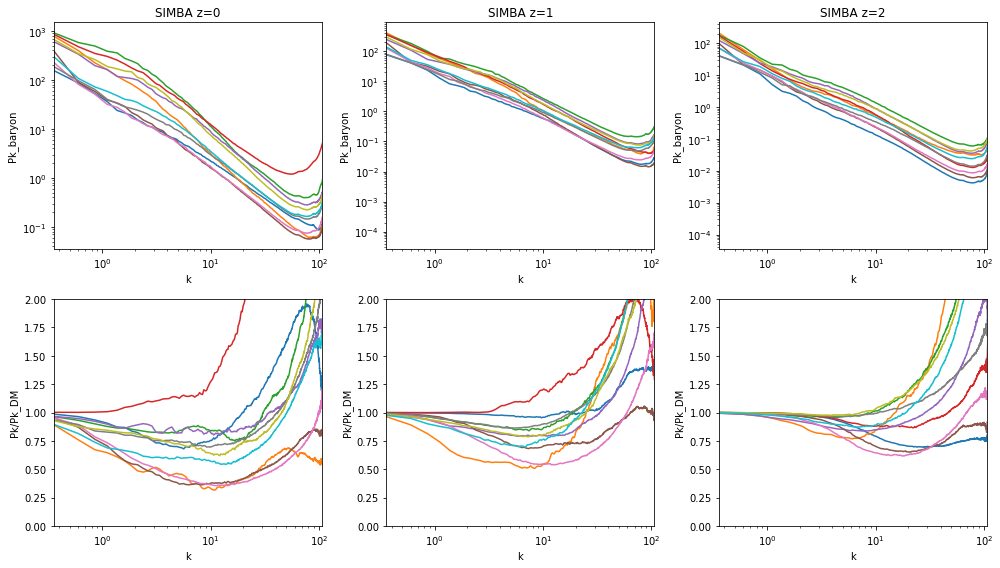

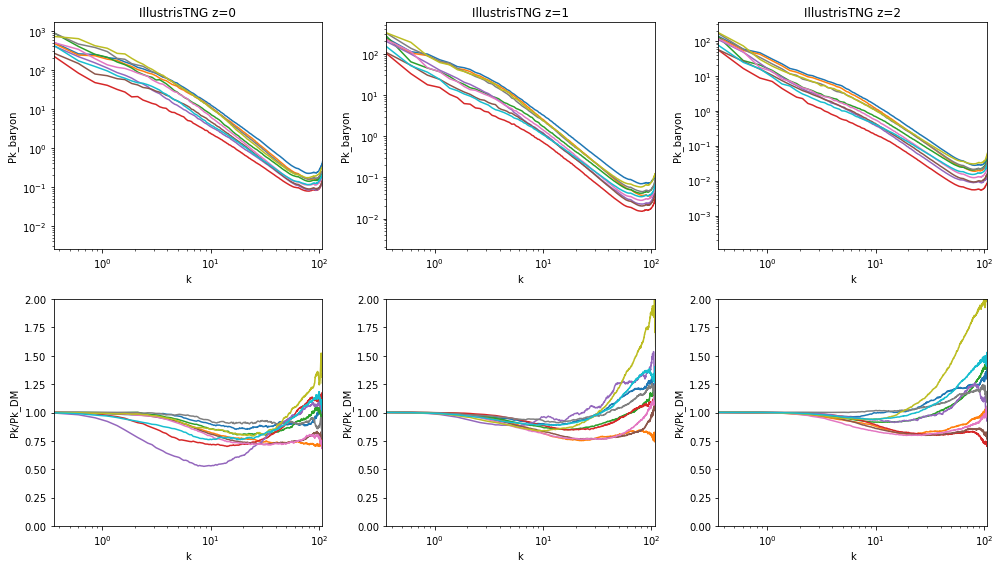

In [5]:
for ifolder in ('SIMBA', 'IllustrisTNG'):
    Pk_0 = np.load(home+'Pk/%s_Pk_m_z=0.00.npy'%(ifolder))
    Pk_DM_0 = np.load(home+'Pk/%s_DM_Pk_m_z=0.00.npy'%(ifolder))
    Pk_1 = np.load(home+'Pk/%s_Pk_m_z=1.05.npy'%(ifolder))
    Pk_DM_1 = np.load(home+'Pk/%s_DM_Pk_m_z=1.05.npy'%(ifolder))
    Pk_2 = np.load(home+'Pk/%s_Pk_m_z=2.00.npy'%(ifolder))
    Pk_DM_2 = np.load(home+'Pk/%s_DM_Pk_m_z=2.00.npy'%(ifolder))

    f, axes=subplots(2,3, figsize=(14,8))
    ax=axes[0]
    for i in range(10):
        ax[0].plot(k, Pk_0[i])
        ax[1].plot(k, Pk_1[i])
        ax[2].plot(k, Pk_2[i])

    for j in range(3):
        # ax[j].set_ylim(0, 2)
        ax[j].set_xlim(k[0], k[-20])
        ax[j].set_xscale('log')
        ax[j].set_yscale('log')
        ax[j].set_xlabel('k')
        ax[j].set_ylabel('Pk_baryon')
        ax[j].set_title('%s z=%i'%(ifolder,j))

    ax=axes[1]
    for i in range(10):
        ax[0].plot(k, Pk_0[i]/Pk_DM_0[i])
        ax[1].plot(k, Pk_1[i]/Pk_DM_1[i])
        ax[2].plot(k, Pk_2[i]/Pk_DM_2[i])

    for j in range(3):
        ax[j].set_ylim(0, 2)
        ax[j].set_xlim(k[0], k[-20])
        ax[j].set_xscale('log')
        ax[j].set_xlabel('k')
        ax[j].set_ylabel('Pk/Pk_DM')
        # ax[j].set_title('%s z=%i'%(ifolder,j))
    plt.tight_layout()
    show()


## Second, take a look at the parameter space (LHC)

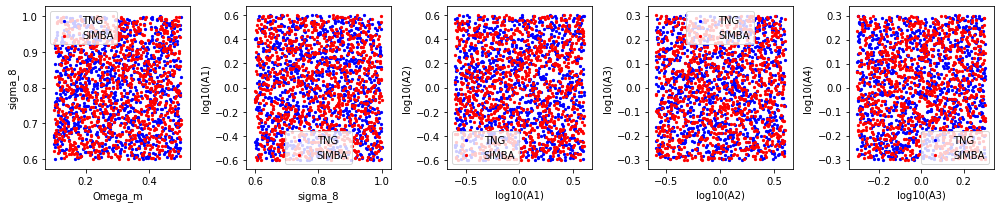

In [6]:
## sort(lhc_TNG.T[0])-sort(lhc_SIMBA.T[0])
### Jia: the 2 parameter files are not sorted the same, but seem to have the same parameters 
### Paco: this is due to LHC, they're not supposed to be the same

labels=['Omega_m', 'sigma_8', 'log10(A1)', 'log10(A2)', 'log10(A3)', 'log10(A4)']
f, ax=subplots(1,5, figsize=(14,3))
for i in range(5):
    ax[i].scatter(lhc_TNG.T[i], lhc_TNG.T[i+1], color='b', label='TNG',s=5)
    ax[i].scatter(lhc_SIMBA.T[i], lhc_SIMBA.T[i+1], color='r', label='SIMBA',s=5)
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[i+1])   
    ax[i].legend()
plt.tight_layout()
show()

## Step 3, build a Gaussian Process for Pk
## need to find best kernel, noise, kmin

In [7]:
########## test gaussian process by take one out, do this for a few random realizations
#### pick a cosmology close-ish to the center
########## remove one and test
# lhc_test=np.delete(lhc_TNG, idx_min,axis=0)
# Pk_test = np.delete(Pk_0, idx_min,axis=0)
# Pk_DM_test = np.delete(Pk_DM_0, idx_min,axis=0)
# test_distance=(lhc_TNG/mean(lhc_TNG, axis=0)-1)**2
# idx_min = int(where(test_distance==amin(test_distance))[0])
# print (idx_min, lhc_TNG[idx_min])
# print (mean(lhc_TNG, axis=0))

In [21]:
## save GP: https://stackoverflow.com/questions/55386254/how-to-save-and-load-gaussian-process-for-production
## test passed
# ifolder='IllustrisTNG'
# z=0
# with open(home + "GP_%s_%.2f.dump"%(ifolder, z) , "wb") as f:
#     pickle.dump(gaussian_process, f)  
 
# GP = pickle.load(open(home + "GP_%s_%.2f.dump"%(ifolder, z),"rb"))
# GP.predict([[0.3, 0.8, 0,0,0,0],])

def buildGP (z, ifolder='IllustrisTNG', kmax=10,  noise_std =  0.05, Ntest=900):
    print ('z %s \t ifolder %s \t kmax %s \t noise %s \t Ntest %s \t'%(z, ifolder, kmax, noise_std, Ntest) )
    ifn=home + "GP/GP_%s_z%.2f_kmax%i_noise%.3f_N%i.dump"%(ifolder, z, kmax, noise_std, Ntest)
    if os.path.isfile(ifn):
        print (ifn, 'already built')
        GP = pickle.load(open(ifn,"rb"))
        return GP
    else:
        Pk_0 = np.load(home+'Pk/%s_Pk_m_z=%.2f.npy'%(ifolder, z))
        Pk_DM_0 = np.load(home+'Pk/%s_DM_Pk_m_z=%.2f.npy'%(ifolder, z))

        kidx=len(k[k<kmax])## cut at kmax
        knew = k[:kidx]
        r_Pk0=(Pk_0/Pk_DM_0)

        lhc_params = np.loadtxt(home+'latin_hypercube_params_%s.txt'%(ifolder))
        lhc_params = concatenate([lhc_params[:,:2], log10(lhc_params[:,2:])],axis=1)
        lhc_test=lhc_params[:Ntest]
        r_Pk = r_Pk0[:Ntest, :kidx]

        kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
        GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, alpha=noise_std**2)

        ###### takes long to compute, save to file
        GP.fit(lhc_test, r_Pk)
        with open(ifn , "wb") as f:
            pickle.dump(GP, f)  
        return GP

In [8]:
### use the std from all 1000 Pk for now, it is over estimation, should use theory later... e.g. counting modes
## https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

ifolder = 'IllustrisTNG' # 'SIMBA' # 
kmax=10
noise_std =  0.05

kidx=len(k[k<kmax])## cut at kmax
knew = k[:kidx]
r_Pk0=(Pk_0/Pk_DM_0)

########## remove 100 and use 900 to build, test on 100
lhc_test=lhc_TNG[:900]
r_Pk = r_Pk0[:900, :kidx]

rtrue= r_Pk0[900:, :kidx]
lhc_true=lhc_TNG[900:]

print (lhc_test.shape, r_Pk.shape)
print (lhc_true.shape, rtrue.shape)

###### takes long to compute
# kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
# gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, alpha=noise_std**2)
# gaussian_process.fit(lhc_test, r_Pk)

###### use ready made GP, fast
gaussian_process=buildGP(0)

(900, 6) (900, 39)
(100, 6) (100, 39)


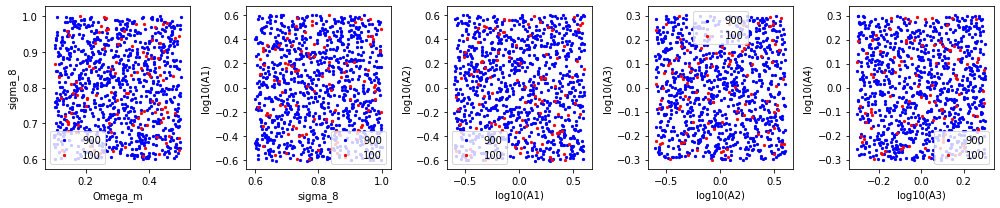

In [9]:
labels=['Omega_m', 'sigma_8', 'log10(A1)', 'log10(A2)', 'log10(A3)', 'log10(A4)']
f, ax=subplots(1,5, figsize=(14,3))
for i in range(5):
    ax[i].scatter(lhc_test.T[i], lhc_test.T[i+1], color='b', label='900',s=5)
    ax[i].scatter(lhc_true.T[i], lhc_true.T[i+1], color='r', label='100',s=5)
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[i+1])  
    ax[i].legend()
plt.tight_layout()
show()

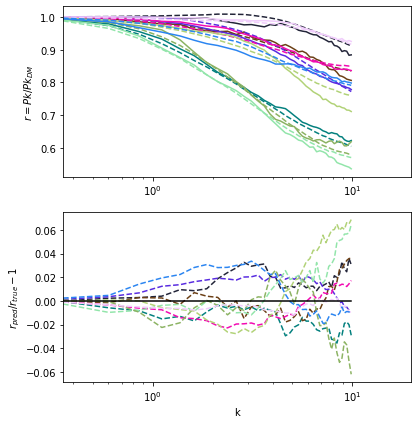

In [11]:
########### may have to build each bin individually
seed(9)

f, ax=subplots(2,1, figsize=(6,6))

for i in range(10):
    
    test_pred = (gaussian_process.predict(lhc_true[i].reshape(-1,1).T)).flatten()
    test_true = rtrue[i].flatten()
    icolor=rand(3)
    ax[0].plot(knew, test_pred, '--',color=icolor)
    ax[0].plot(knew, test_true, '-',color=icolor, label='%s'%(lhc_true[i]))
    ax[1].plot(knew, test_pred/test_true-1, '--',color=icolor)
    

# ax[0].set_ylim(0.5, 1.2)
ax[0].set_xlim(knew[0], knew[-1]*2)
ax[0].set_xscale('log')
ax[0].set_ylabel('$r=Pk/Pk_{DM}$')
# ax[0].legend()

ax[1].set_xlim(knew[0], knew[-1]*2)
ax[1].set_ylabel('$r_{pred}/r_{true}-1$')
ax[1].plot(knew, zeros(len(knew)),'k-')
ax[1].set_xscale('log')
ax[1].set_xlabel('k')

plt.tight_layout()
show()

(100, 39) (100, 39) (100,) (100,)


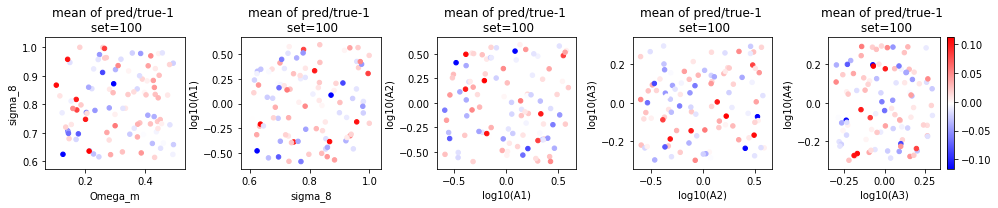

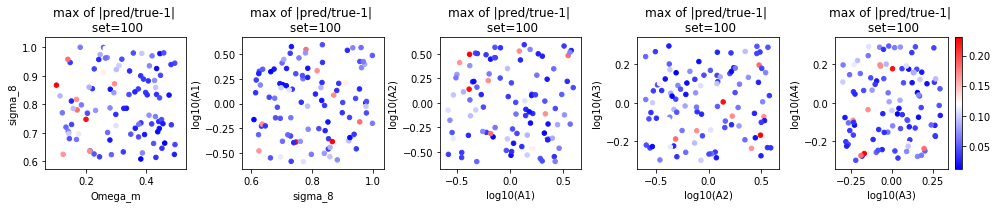

In [12]:
rpred = gaussian_process.predict(lhc_true)

diff_mean = mean(rpred/rtrue,axis=1)-1
diff_max = amax(abs(rpred/rtrue-1),axis=1)

print (rpred.shape, rtrue.shape, diff_mean.shape, diff_max.shape)

labels=['Omega_m', 'sigma_8', 'log10(A1)', 'log10(A2)', 'log10(A3)', 'log10(A4)']
f, ax=subplots(1,5, figsize=(14,3))
for i in range(5):
    cb=ax[i].scatter(lhc_true.T[i], lhc_true.T[i+1], c=diff_mean, s=20,
                     cmap='bwr',vmin=amin(diff_mean), vmax=amax(diff_mean))
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[i+1]) 
    if i==4:
        colorbar(cb,ax=ax[i])
    ax[i].set_title('mean of pred/true-1 \n set=100')
plt.tight_layout()
show()

f, ax=subplots(1,5, figsize=(14,3))
for i in range(5):
    cb=ax[i].scatter(lhc_true.T[i], lhc_true.T[i+1], c=diff_max, s=20,
                     cmap='bwr',vmin=amin(diff_max), vmax=amax(diff_max))
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[i+1]) 
    if i==4:
        colorbar(cb,ax=ax[i])
    ax[i].set_title('max of |pred/true-1| \n set=100')
plt.tight_layout()
show()

(900, 39) (100, 39) (900,) (900,)


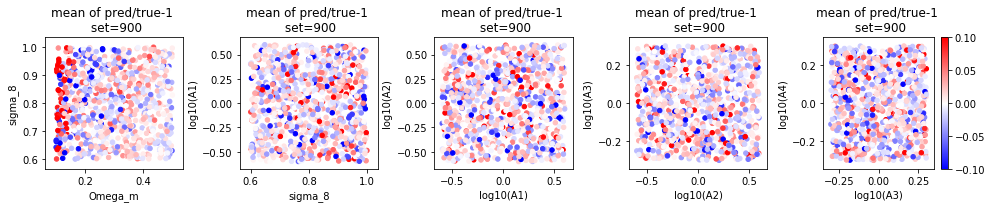

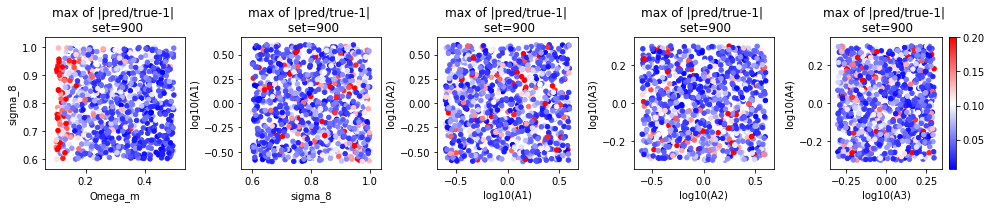

In [13]:
rpred = gaussian_process.predict(lhc_test)

diff_mean = mean(rpred/r_Pk,axis=1)-1
diff_max = amax(abs(rpred/r_Pk-1),axis=1)

print (rpred.shape, rtrue.shape, diff_mean.shape, diff_max.shape)

labels=['Omega_m', 'sigma_8', 'log10(A1)', 'log10(A2)', 'log10(A3)', 'log10(A4)']
f, ax=subplots(1,5, figsize=(14,3))
for i in range(5):
    cb=ax[i].scatter(lhc_test.T[i], lhc_test.T[i+1], c=diff_mean, s=20,
                     cmap='bwr',vmin=-0.1, vmax=0.1)#vmin=amin(diff_mean),  #amax(diff_mean))
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[i+1]) 
    if i==4:
        colorbar(cb,ax=ax[i])
    ax[i].set_title('mean of pred/true-1 \n set=900')
plt.tight_layout()
show()

f, ax=subplots(1,5, figsize=(14,3))
for i in range(5):
    cb=ax[i].scatter(lhc_test.T[i], lhc_test.T[i+1], c=diff_max, s=20,
                     cmap='bwr',vmin=amin(diff_max), vmax=0.2)#amax(diff_max))
    ax[i].set_xlabel(labels[i])
    ax[i].set_ylabel(labels[i+1]) 
    if i==4:
        colorbar(cb,ax=ax[i])
    ax[i].set_title('max of |pred/true-1| \n set=900')
plt.tight_layout()
show()

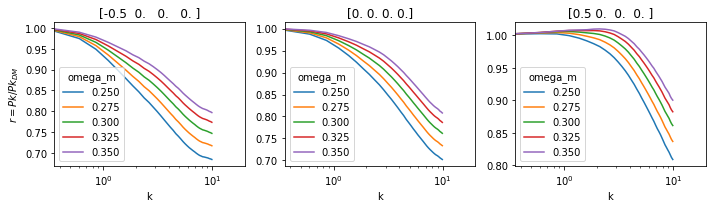

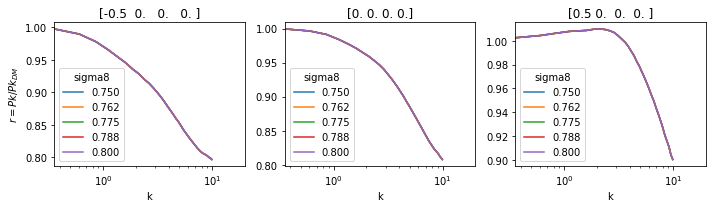

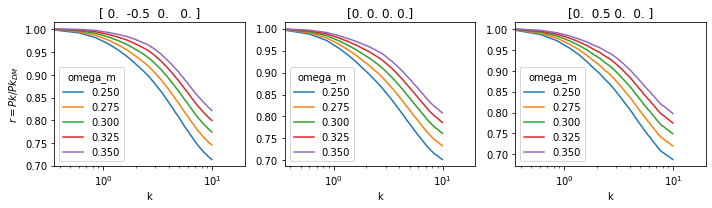

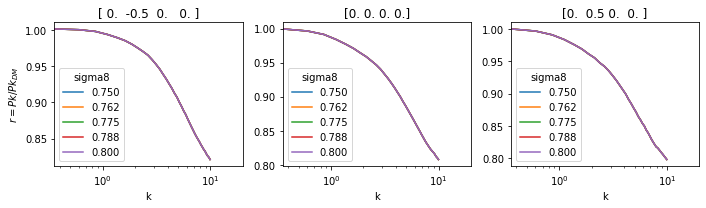

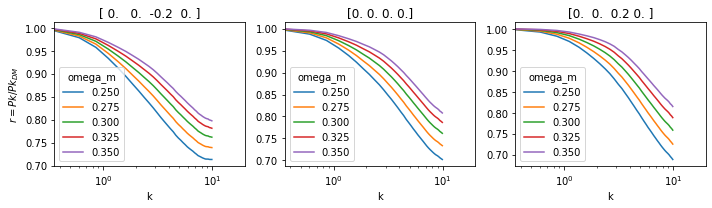

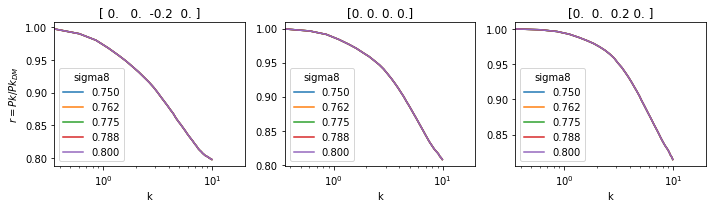

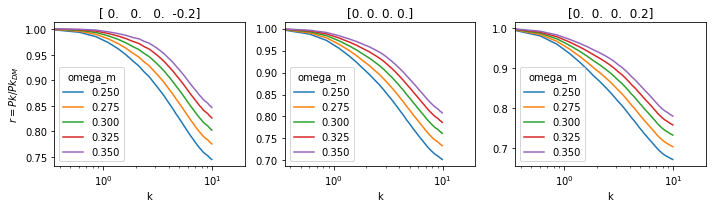

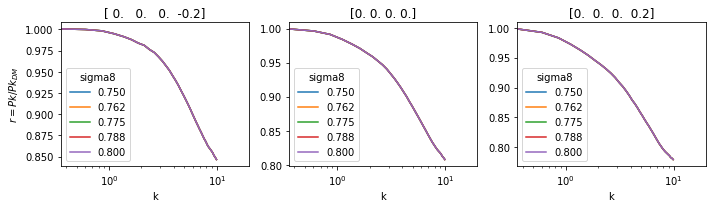

In [14]:
Nbin_cosmo=5
om_arr=linspace(0.25,0.35,Nbin_cosmo)
si8_arr=linspace(0.75, 0.8, Nbin_cosmo)
om=0.3
si8=0.8

Nbin_bary=3
A1, A2, A3, A4 = mean(lhc_TNG[:,2:],axis=0)
A1_arr = linspace(-0.5, 0.5, Nbin_bary)
A2_arr = linspace(-0.5, 0.5, Nbin_bary)
A3_arr = linspace(-0.2, 0.2, Nbin_bary)
A4_arr = linspace(-0.2, 0.2, Nbin_bary)

for ibary in range(4):
    f,ax=subplots(1, Nbin_bary, figsize=(10,3))
    for i in range(Nbin_bary):
        iparam_bary=zeros(4)
        iparam_bary[ibary]=[A1_arr, A2_arr, A3_arr, A4_arr][ibary][i]
        for jj in range(Nbin_cosmo):
            iom = om_arr[jj]
            iparam=concatenate([[iom, si8], iparam_bary])
            irpred=gaussian_process.predict([iparam,]).flatten()
            ax[i].plot(knew, irpred, label='%.3f'%(iom))
        ax[i].legend(title='omega_m',loc='lower left')
        ax[i].set_title('%s'%(iparam_bary))
        ax[i].set_xlim(knew[0], knew[-1]*2)
        ax[i].set_xscale('log')  
        ax[i].set_xlabel('k')
    ax[0].set_ylabel('$r=Pk/Pk_{DM}$')
    plt.tight_layout()
    show()

    f,ax=subplots(1, Nbin_bary, figsize=(10,3))
    for i in range(Nbin_bary):
        iparam_bary=zeros(4)
        iparam_bary[ibary]=[A1_arr, A2_arr, A3_arr, A4_arr][ibary][i]
        for kk in range(Nbin_cosmo):
            isi8 = si8_arr[kk]
            iparam=concatenate([[iom, si8], iparam_bary])
            irpred=gaussian_process.predict([iparam,]).flatten()
            ax[i].plot(knew, irpred, label='%.3f'%(isi8))
        ax[i].legend(title='sigma8',loc='lower left')
        ax[i].set_title('%s'%(iparam_bary))
        ax[i].set_xlim(knew[0], knew[-1]*2)
        ax[i].set_xscale('log')  
        ax[i].set_xlabel('k')
    ax[0].set_ylabel('$r=Pk/Pk_{DM}$')
    plt.tight_layout()
    show()

## seems like sigma8 has little effect, while omega_m has bigger effect (7/11/2022)
#### (1) test if omega_m effect can be accounted for with different age of universe (om=0.25 has longer history, and hence more time for baryons effects, indeed the suppression is the largest)... next, use om=0.35 as baseline, find the corresponding z(age of universe for om 3.5), build an emulator for each redshift, and compare at the same age.
####  (2) may consider build a 7 parameter emulator to take into account of z?

In [15]:
### a function getting t from z, for a given cosmology
### an inverse function getting z from t, for a given cosmology
### https://docs.astropy.org/en/stable/api/astropy.cosmology.z_at_value.html#astropy.cosmology.z_at_value

# Omega_b = 0.049
# h = 0.6711
# ns = 0.9624
# w = -1
# mnu = 0.0 #eV
# Omega_k = 0.0

from astropy.cosmology import FlatLambdaCDM, z_at_value

def z2t (z, om):
    cosmo = FlatLambdaCDM(H0=h*100, Om0=om)
    return cosmo.age(z)

def t2z (t, om):
    cosmo = FlatLambdaCDM(H0=h*100, Om0=om)
    return z_at_value (cosmo.age, t)

In [16]:
om=0.35
t=z2t (0, om)
print (om, t)

# for iom in linspace(0.2, om, 1001)[:-1]:
#     zout = t2z(t, iom)
#     ###### find corredsponding om for z=0.05, 0.1
#     if abs(zout/0.05-1)<0.005 or abs(zout/0.1-1)<0.005:
#         print (iom, zout)

0.35 13.447271368273858 Gyr


In [17]:
### seems like om=0.292 is good for z=0.05, and om=0.2476 is good for z=0.1
for iom in (0.2921, 0.2475):
    print (iom, t2z(t, iom))

0.2921 0.05011651696118677
0.2475 0.10011457302083969
